In [1]:
print("Hello World!")

Hello World!


In [4]:
from tinygrad.core import Tensor
from tinygrad.nn import SimpleMLP
from tinygrad.losses import MSELoss
from tinygrad.optimizers import SimpleSGD, Adam

import numpy as np
import matplotlib.pyplot as plt
import random
import math

from sklearn.model_selection import train_test_split

In [11]:
path = "IrisFlower/iris.data"

dataset = []
with open(path) as fp:
    file = fp.read().splitlines()
file = [line.split(",") for line in file]
file = file[:150]

dataset = [[list(map(float, line[:4])), line[4]] for line in file]

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
dataset = [[row[0], classes.index(row[1])] for row in dataset]

In [12]:
train_ids = [random.sample(range(i,i+50), k=40) for i in [0, 50, 100]]
train_ids = [item for sublist in train_ids for item in sublist]

val_ids = [i for i in range(150) if i not in train_ids]

trainset = [dataset[i] for i in train_ids]
valset = [dataset[i] for i in val_ids]

In [13]:
print("Trainset size: ", len(trainset))
print("Valset size: ", len(valset))

Trainset size:  120
Valset size:  30


In [6]:
# now we define the model 
# we are going to define a 4, 8, 8, 1 model 
model = SimpleMLP(4, 1, [8, 8])

# temporary fix to make last layer nonlin=False
for i, layer in enumerate(model.layers):
    if i == len(model.layers) - 1:
        for n in layer.neurons:
            n.nonlin = False

# print the model summary
model.summary()

#total parameters
print("Number of parameters:", len(model.parameters()))


SimpleMLP(
Linear(ins:4 outs:8 num_parameters:40)
Linear(ins:8 outs:8 num_parameters:72)
Linear(ins:8 outs:1 num_parameters:9)
)
Number of parameters: 121


In [7]:
epochs = 500
lr = 0.001

optimizer = SimpleSGD(model.parameters(), lr=lr)
loss_fn = MSELoss

X = [list(map(Tensor, x[0])) for x in trainset]
Y = [Tensor(x[1]) for x in trainset]

losslist = [] #to store losses

for i in range(epochs):
    
    preds = list(map(model, X)) # we do gradient descent
    
    loss = loss_fn(preds, Y)
    
    model.zero_grad()
    loss.backward()
    
    optimizer.step()
    
    if i%5 == 0:
        print("For epoch: {}, loss: {}".format(i, loss.data))
        losslist.append(loss.data)

For epoch: 0, loss: 60.130727777643884
For epoch: 5, loss: 0.7712787610804327
For epoch: 10, loss: 0.46219525996032396
For epoch: 15, loss: 0.2891760491648806
For epoch: 20, loss: 0.19942535062747227
For epoch: 25, loss: 0.150112504230865
For epoch: 30, loss: 0.12284523493826181
For epoch: 35, loss: 0.10781866924615685
For epoch: 40, loss: 0.0991380179068486
For epoch: 45, loss: 0.09376738503437174
For epoch: 50, loss: 0.09042586739242538
For epoch: 55, loss: 0.08824914359129224
For epoch: 60, loss: 0.08639046674862737
For epoch: 65, loss: 0.08460879565532758
For epoch: 70, loss: 0.0831564368012693
For epoch: 75, loss: 0.08190254679564679
For epoch: 80, loss: 0.08077636720262737
For epoch: 85, loss: 0.07996345335703128
For epoch: 90, loss: 0.07927067924074244
For epoch: 95, loss: 0.07872298038383277
For epoch: 100, loss: 0.07819942097592325
For epoch: 105, loss: 0.07769802619523128
For epoch: 110, loss: 0.0772171511871068
For epoch: 115, loss: 0.07676121708701591
For epoch: 120, loss: 

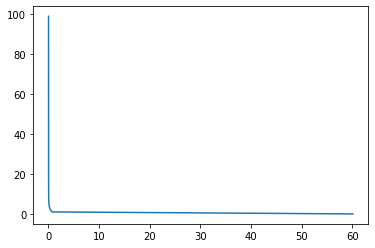

In [8]:
plt.plot(losslist, range(len(losslist)))

In [15]:
X_val = [list(map(Tensor, x[0])) for x in valset]
Y_val = [Tensor(x[1]) for x in valset]

preds = list(map(model, X_val))

In [10]:
val_loss = loss_fn(preds, Y_val)
print("val loss: ", val_loss.data)

val loss:  0.047896011766359416


In [11]:
accuracy = 0
idx = 0
for pi, yi in zip(preds, Y_val):
    if idx % 2 == 0:
        print("idx: {}, predicted: {}, true value: {}".format(idx, round((pi.data)), yi.data))
    if round(pi.data) == yi.data:
        accuracy += 1
    idx += 1
print("Validation accuracy: {}%".format((accuracy/len(Y_val)) * 100))

idx: 0, predicted: 0, true value: 0
idx: 2, predicted: 0, true value: 0
idx: 4, predicted: 0, true value: 0
idx: 6, predicted: 0, true value: 0
idx: 8, predicted: 0, true value: 0
idx: 10, predicted: 1, true value: 1
idx: 12, predicted: 1, true value: 1
idx: 14, predicted: 1, true value: 1
idx: 16, predicted: 2, true value: 1
idx: 18, predicted: 1, true value: 1
idx: 20, predicted: 2, true value: 2
idx: 22, predicted: 2, true value: 2
idx: 24, predicted: 2, true value: 2
idx: 26, predicted: 2, true value: 2
idx: 28, predicted: 2, true value: 2
Validation accuracy: 96.66666666666667%


In [12]:
# now we save the model 
model.save("saved_models/model_SGD_96.pkl")

In [16]:
# now we load the weigths and check 
# we instantiate a new model
val_model = SimpleMLP(4, 1, [8, 8])
val_model.load_pkl("saved_models/model_SGD_96.pkl")

preds = list(map(val_model, X_val))

accuracy = 0
idx = 0
for pi, yi in zip(preds, Y_val):
    if idx % 3 == 0:
        print("idx: {}, predicted: {}, true value: {}".format(idx, round((pi.data)), yi.data))
    if round(pi.data) == yi.data:
        accuracy += 1
    idx += 1
print("Validation accuracy: {}%".format((accuracy/len(Y_val)) * 100))


idx: 0, predicted: 0, true value: 0
idx: 3, predicted: 0, true value: 0
idx: 6, predicted: 0, true value: 0
idx: 9, predicted: 0, true value: 0
idx: 12, predicted: 1, true value: 1
idx: 15, predicted: 1, true value: 1
idx: 18, predicted: 1, true value: 1
idx: 21, predicted: 2, true value: 2
idx: 24, predicted: 2, true value: 2
idx: 27, predicted: 2, true value: 2
Validation accuracy: 96.66666666666667%
